In [7]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
from sklearn.metrics import r2_score

# Load dataset
df = pd.read_csv('Traffic_data2.csv')

# Convert the 'datetime' column to datetime format
df['datetime_utc'] = pd.to_datetime(df['datetime_utc'], format='%m/%d/%Y %H:%M')

# Filter out rows with 'datetime' values between 1:00 and 4:00
df = df[(df['datetime_utc'].dt.hour < 1) | (df['datetime_utc'].dt.hour >= 4)]

# Select relevant columns for analysis
columns = ['duration(minutes)', 'MS407', 'MS423', 'Weekday', 'Rush_hour', 'W+R2', 'min_max', 'logMS407', 'logMS423', 'diff', 'datetime_utc']
df = df[columns]

# Drop rows with any missing values
df = df.dropna()

# Define features (X) and target variables (y)
x = df[['duration(minutes)', 'min_max', 'Weekday', 'Rush_hour', 'W+R2', 'diff']]
y = df[['logMS407', 'logMS423']]

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=10)

# Initialize and train a Decision Tree Regressor model
dt_reg = DecisionTreeRegressor(max_depth=10, min_samples_split=2, min_samples_leaf=2)
dt_reg.fit(x_train, y_train)

# Make predictions on the test and training sets
y_pred = dt_reg.predict(x_test)
y_pred2 = dt_reg.predict(x_train)

# Calculate R-squared scores to evaluate model performance
r2_train = r2_score(y_train, y_pred2)
r2_test = r2_score(y_test, y_pred)

# Print the R-squared values for both training and testing sets
print("R-squared (Training):", r2_train)
print("R-squared (Testing):", r2_test)

# Calculate Mean Absolute Error (MAE) and Mean Absolute Percentage Error (MAPE)
mae = mean_absolute_error(10**y_test, 10**y_pred)
mape = mean_absolute_percentage_error(10**y_test, 10**y_pred)
print('Mean Absolute Error:', mae)
print('Mean Absolute Percentage Error:', mape)

# Print feature importances as determined by the Decision Tree model
print(dt_reg.feature_importances_)

R-squared (Training): 0.793724214322542
R-squared (Testing): 0.7677397959060673
Mean Absolute Error: 95.88014271161816
Mean Absolute Percentage Error: 0.14551398342012245
[0.80560141 0.09616009 0.073256   0.01292295 0.00166308 0.01039647]


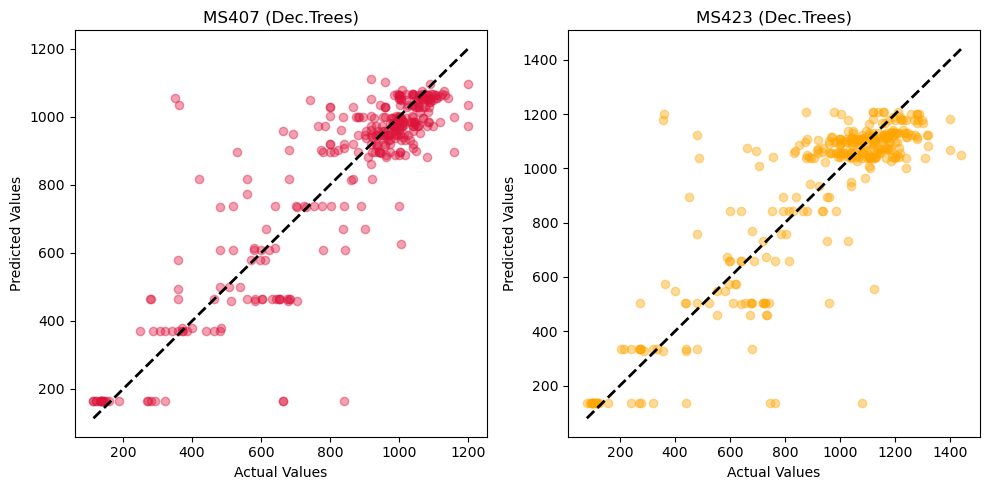

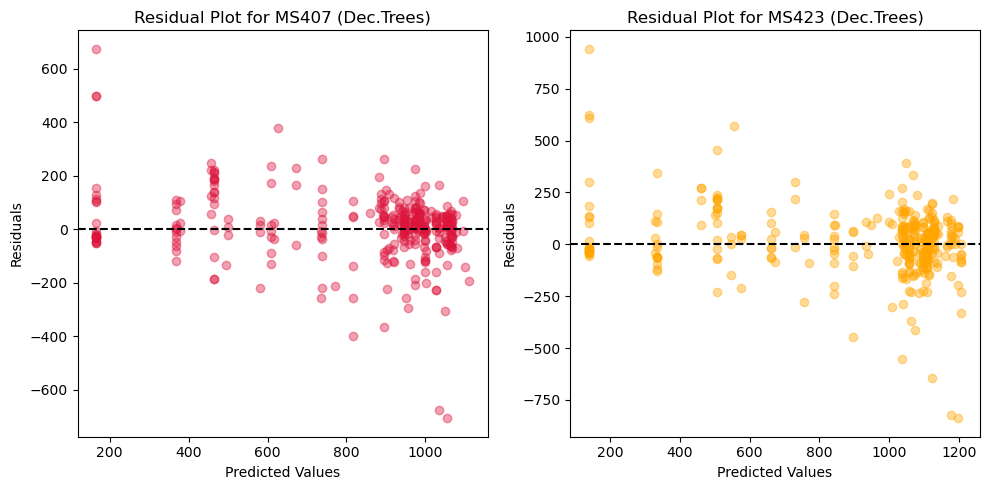

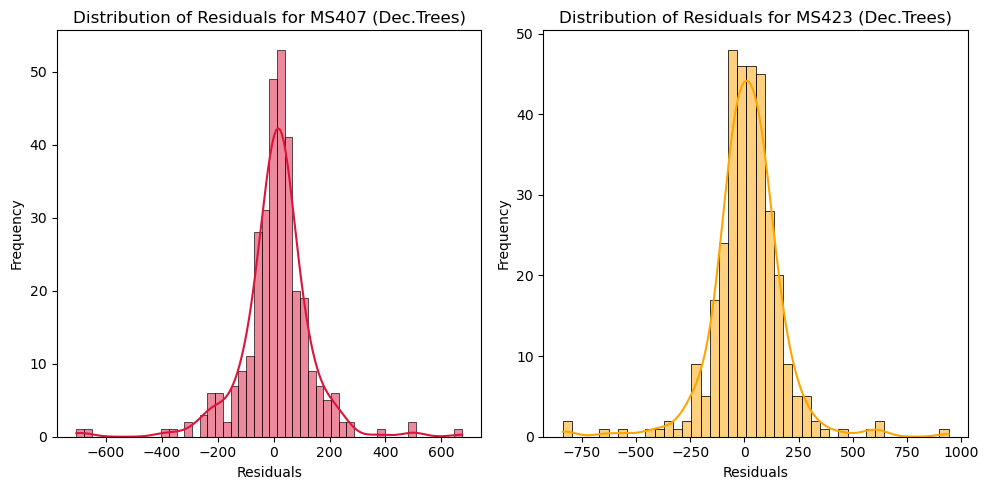

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define a function for creating scatter plots
def plot_scatter(ax, actual, predicted, color, title):
    ax.scatter(10**actual, 10**predicted, c=color, marker='o', alpha=0.4)
    min_val = min(10**actual)
    max_val = max(10**actual)
    ax.plot([min_val, max_val], [min_val, max_val], color='black', linestyle='--', lw=2)
    ax.set_xlabel('Actual Values')
    ax.set_ylabel('Predicted Values')
    ax.set_title(title)

# Scatter Plots for 'logMS407' and 'logMS423'
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

plot_scatter(axes[0], y_test['logMS407'], y_pred[:, 0], 'crimson', 'MS407 (Dec.Trees)')
plot_scatter(axes[1], y_test['logMS423'], y_pred[:, 1], 'orange', 'MS423 (Dec.Trees)')

plt.tight_layout()
plt.savefig('scatter_plot_MSDec.Trees.png')
plt.show()

# Residual Plots
def plot_residuals(ax, predicted, residuals, color, title):
    ax.scatter(10**predicted, residuals, color=color, alpha=0.4)
    ax.axhline(y=0, color='black', linestyle='--')
    ax.set_xlabel('Predicted Values')
    ax.set_ylabel('Residuals')
    ax.set_title(title)

residuals407 = 10**y_test['logMS407'] - 10**y_pred[:, 0]
residuals423 = 10**y_test['logMS423'] - 10**y_pred[:, 1]

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

plot_residuals(axes[0], y_pred[:, 0], residuals407, 'crimson', 'Residual Plot for MS407 (Dec.Trees)')
plot_residuals(axes[1], y_pred[:, 1], residuals423, 'orange', 'Residual Plot for MS423 (Dec.Trees)')

plt.tight_layout()
plt.savefig('residual_plot_MSDec.Trees.png')
plt.show()

# Distribution Plots of Residuals
def plot_distribution(ax, residuals, color, title):
    sns.histplot(residuals, kde=True, color=color, ax=ax)
    ax.set_xlabel("Residuals")
    ax.set_ylabel("Frequency")
    ax.set_title(title)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

plot_distribution(axes[0], residuals407, 'crimson', 'Distribution of Residuals for MS407 (Dec.Trees)')
plot_distribution(axes[1], residuals423, 'orange', 'Distribution of Residuals for MS423 (Dec.Trees)')

plt.tight_layout()
plt.savefig('distribution_plot_MSDec.Trees.png')
plt.show()


In [9]:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score

# Load dataset
df = pd.read_csv('Traffic_data2.csv')

# Convert the 'datetime' column to datetime format
df['datetime_utc'] = pd.to_datetime(df['datetime_utc'], format='%m/%d/%Y %H:%M')

# Filter out rows with 'datetime' values between 1:00 and 4:00
df = df[(df['datetime_utc'].dt.hour < 1) | (df['datetime_utc'].dt.hour >= 4)]

# Select relevant columns for analysis
columns = ['duration(minutes)','MS407','MS423','Weekday','Rush_hour','W+R2','min_max','logMS407','logMS423','diff','datetime_utc']
df = df[columns]

# Drop rows with any missing values
df = df.dropna()

# Define features and target variables
x = df[['duration(minutes)', 'min_max', 'Weekday', 'Rush_hour', 'W+R2', 'diff']]
y = df[['logMS407', 'logMS423']] 

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=10)

# Initialize Gradient Boosting Regressor
gbr = GradientBoostingRegressor(n_estimators=100, max_depth=8, random_state=10)

# Wrap the GBDT with MultiOutputRegressor to handle multi-target regression
multi_target_gbr = MultiOutputRegressor(gbr)

# Train the model
multi_target_gbr.fit(x_train, y_train)

# Make predictions
y_pred3 = multi_target_gbr.predict(x_test)
y_pred4 = multi_target_gbr.predict(x_train)

# Calculate R-squared values
r2_train = r2_score(y_train, y_pred4)
r2_test = r2_score(y_test, y_pred3)

print("R-squared (Training):", r2_train)
print("R-squared (Testing):", r2_test)

# Calculate MAE and MAPE (back-transforming the log predictions)
mae = mean_absolute_error(10**y_test, 10**y_pred3)
mape = mean_absolute_percentage_error(10**y_test, 10**y_pred3)
print('Mean Absolute Error:', mae)
print('Mean Absolute Percentage Error:', mape)

# Feature Importances
print(np.mean([est.feature_importances_ for est in multi_target_gbr.estimators_], axis=0))


R-squared (Training): 0.73172751289795
R-squared (Testing): 0.7771693426257569
Mean Absolute Error: 94.32334849608992
Mean Absolute Percentage Error: 0.15308391292144408
[0.76859526 0.10935019 0.07101308 0.01572258 0.00388146 0.03143742]


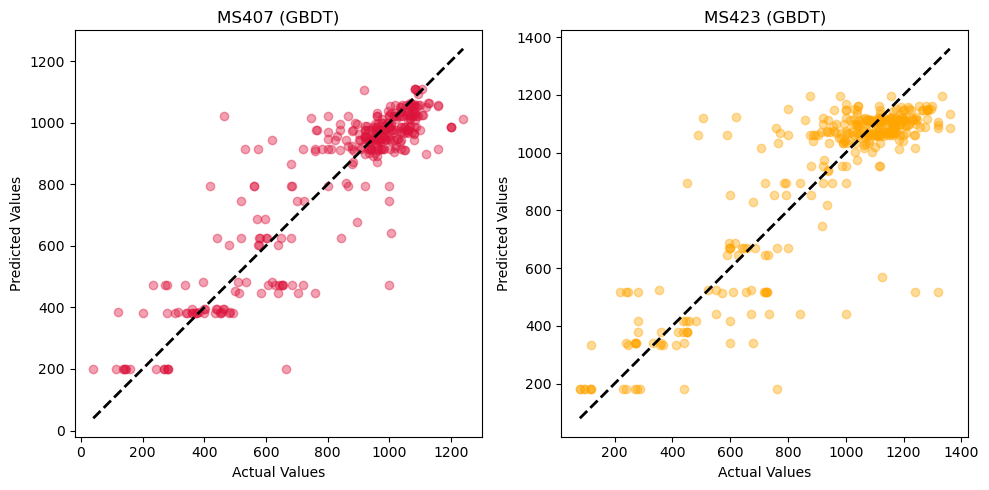

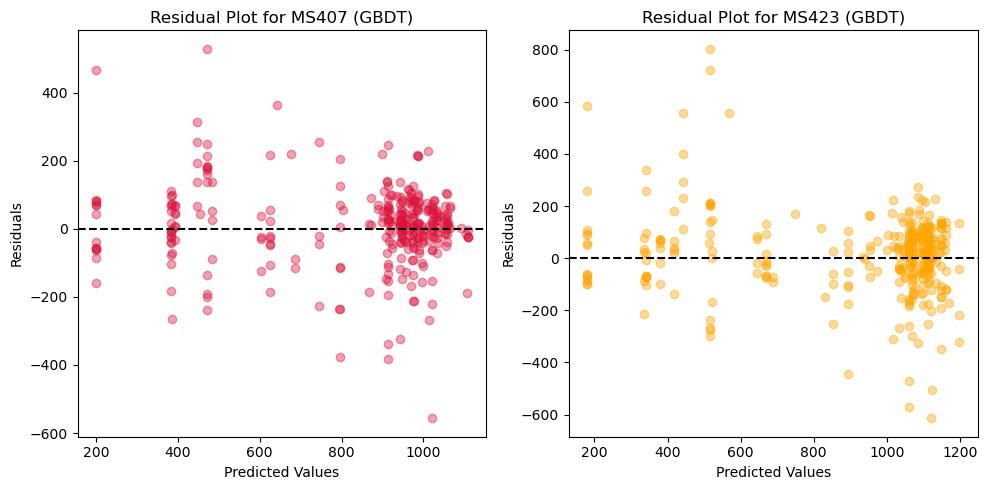

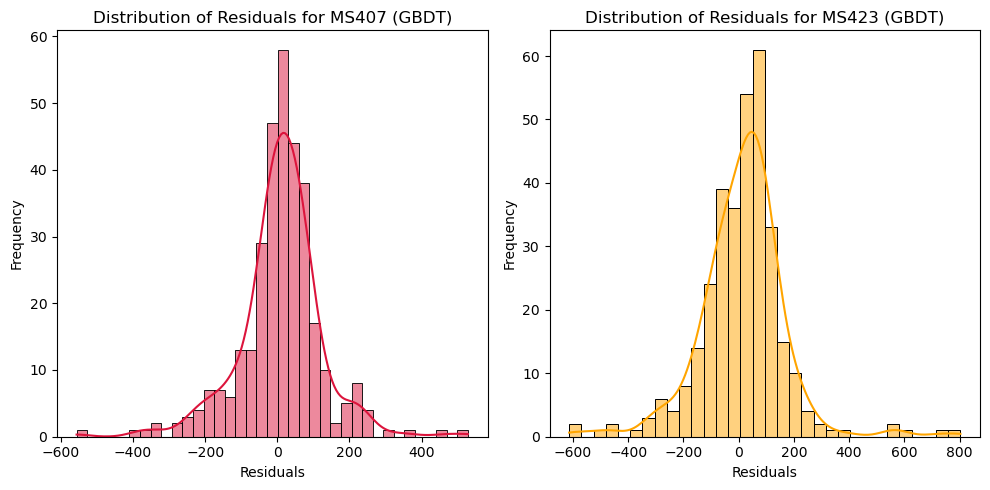

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Function to create scatter plots
def plot_scatter(ax, actual, predicted, color, title):
    ax.scatter(10**actual, 10**predicted, c=color, marker='o', alpha=0.4)
    min_val = min(10**actual)
    max_val = max(10**actual)
    ax.plot([min_val, max_val], [min_val, max_val], color='black', linestyle='--', lw=2)
    ax.set_xlabel('Actual Values')
    ax.set_ylabel('Predicted Values')
    ax.set_title(title)

# Scatter Plots for 'logMS407' and 'logMS423'
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

plot_scatter(axes[0], y_test['logMS407'], y_pred3[:, 0], 'crimson', 'MS407 (GBDT)')
plot_scatter(axes[1], y_test['logMS423'], y_pred3[:, 1], 'orange', 'MS423 (GBDT)')

plt.tight_layout()
plt.savefig('scatter_plot_MSGBDT.png')
plt.show()

# Function to create residual plots
def plot_residuals(ax, predicted, residuals, color, title):
    ax.scatter(10**predicted, residuals, color=color, alpha=0.4)
    ax.axhline(y=0, color='black', linestyle='--')
    ax.set_xlabel('Predicted Values')
    ax.set_ylabel('Residuals')
    ax.set_title(title)

# Calculating residuals
residuals407 = 10**y_test['logMS407'] - 10**y_pred3[:, 0]
residuals423 = 10**y_test['logMS423'] - 10**y_pred3[:, 1]

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

plot_residuals(axes[0], y_pred3[:, 0], residuals407, 'crimson', 'Residual Plot for MS407 (GBDT)')
plot_residuals(axes[1], y_pred3[:, 1], residuals423, 'orange', 'Residual Plot for MS423 (GBDT)')

plt.tight_layout()
plt.savefig('residual_plot_MSGBDT.png')
plt.show()

# Function to create distribution plots of residuals
def plot_distribution(ax, residuals, color, title):
    sns.histplot(residuals, kde=True, color=color, ax=ax)
    ax.set_xlabel("Residuals")
    ax.set_ylabel("Frequency")
    ax.set_title(title)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

plot_distribution(axes[0], residuals407, 'crimson', 'Distribution of Residuals for MS407 (GBDT)')
plot_distribution(axes[1], residuals423, 'orange', 'Distribution of Residuals for MS423 (GBDT)')

plt.tight_layout()
plt.savefig('distribution_plot_MSGBDT.png')
plt.show()
